In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data= {'B':[80,60,50],'C':[150,100,100], 'D':[135,100,80], 'E':[165,120,100], 'F':[95,70,60], 'G':[130,90,80], 'H':[110,80,70]}
country= pd.DataFrame(data=Data, index= ['Output,Q','Labour,L','Capital,K'])
country.head()

,B,C,D,E,F,G,H
"Output,Q",80,150,135,165,95,130,110
"Labour,L",60,100,100,120,70,90,80
"Capital,K",50,100,80,100,60,80,70


In [4]:
Output_mean=country.iloc[0].mean()
print ("Output,Q mean is",Output_mean)
Labour_mean=country.iloc[1].mean()
print('Labour,L mean is',Labour_mean)
Capital_mean=country.iloc[2].mean()
print('Capital,K mean is',Capital_mean)

Output,Q mean is 123.57142857142857
Labour,L mean is 88.57142857142857
Capital,K mean is 77.14285714285714


In [5]:
Output_var=country.iloc[0].var()
print ("Output,Q variance is",Output_var)
Labour_var=country.iloc[1].var()
print('Labour,L variance is',Labour_var)
Capital_var=country.iloc[2].var()
print('Capital,K variance is',Capital_var)

Output,Q variance is 914.2857142857143
Labour,L variance is 414.2857142857143
Capital,K variance is 357.14285714285717


In [6]:
Output_std=country.iloc[0].std()
print ("Output,Q Standard Deviation is",Output_std)
Labour_std=country.iloc[1].std()
print('Labour,L Standard Deviation is',Labour_std)
Capital_std=country.iloc[2].std()
print('Capital,K Standard Deviation is',Capital_std)

Output,Q Standard Deviation is 30.237157840738178
Labour,L Standard Deviation is 20.354009783964297
Capital,K Standard Deviation is 18.89822365046136


In [7]:
Output_median=country.iloc[0].median()
print ("Output,Q median is",Output_median)
Labour_median=country.iloc[1].median()
print('Labour,L median is',Labour_median)
Capital_median=country.iloc[2].median()
print('Capital,K median is',Capital_median)

Output,Q median is 130.0
Labour,L median is 90.0
Capital,K median is 80.0


Text(0, 0.5, 'Sample')

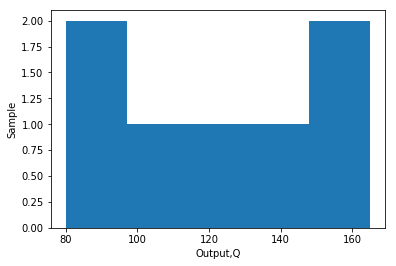

In [8]:
country_Output= country.iloc[0]
plt.hist(country_Output,bins=5)
plt.xlabel('Output,Q')
plt.ylabel('Sample')


Text(0, 0.5, 'Sample')

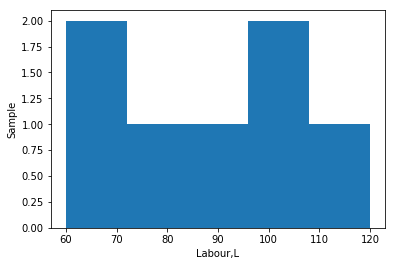

In [9]:
country_Labour=country.iloc[1]
plt.hist(country_Labour,bins=5)
plt.xlabel('Labour,L')
plt.ylabel('Sample')

In [10]:
#ln(Q)=ln(A) + alpha*ln(L)+beta*ln(K)
Country=np.log(country)
#log values of the data
Country

,B,C,D,E,F,G,H
"Output,Q",4.382027,5.010635,4.905275,5.105945,4.553877,4.867534,4.700480
"Labour,L",4.094345,4.605170,4.605170,4.787492,4.248495,4.499810,4.382027
"Capital,K",3.912023,4.605170,4.382027,4.605170,4.094345,4.382027,4.248495


In [11]:
# Multi Regression Modelling
# ln(Q)=ln(A) + alpha*ln(L)+beta*ln(K)  ,the equation is linear where alpha and beta are slope and A is intercept
Country = np.log(country.T)
Country #natural log of Q,L and K
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(Country[['Labour,L','Capital,K']],Country[['Output,Q']])
Country['Estimation Output,Q'] = regr.predict(Country[['Labour,L','Capital,K']])
print (Country)

#coefficinet (that is value of alpha nad beta)
coefficents=regr.coef_
intercept=regr.intercept_
print('The values of alpha and beta are',coefficents)
print('the value of Intercept is',intercept)
sumed=np.sum(coefficents)
print('The value of sum of alpha and beta is',sumed)
 


   Output,Q  Labour,L  Capital,K  Estimation Output,Q
B  4.382027  4.094345   3.912023             4.381890
C  5.010635  4.605170   4.605170             5.014674
D  4.905275  4.605170   4.382027             4.901151
E  5.105945  4.787492   4.605170             5.114664
F  4.553877  4.248495   4.094345             4.559185
G  4.867534  4.499810   4.382027             4.843369
H  4.700480  4.382027   4.248495             4.710840
The values of alpha and beta are [[0.54842747 0.50874094]]
the value of Intercept is [0.14623321]
The value of sum of alpha and beta is 1.0571684057723618


Text(0, 0.5, 'Residual')

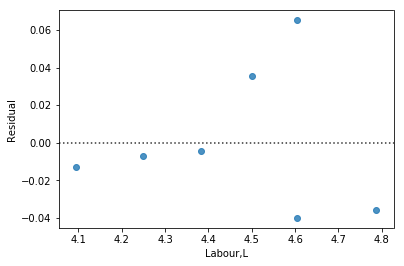

In [12]:
#residual plot of Labour and Output
import seaborn as sns
y = Country[['Output,Q']]
x = Country[['Labour,L']]
sns.residplot(x,y)
plt.xlabel('Labour,L')
plt.ylabel('Residual')


Text(0, 0.5, 'Residual')

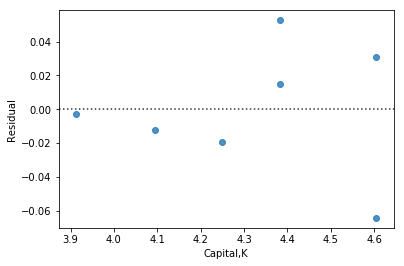

In [13]:
#residual plot of Capital and Output
import seaborn as sns
y = Country[['Output,Q']]
x = Country[['Capital,K']]
sns.residplot(x,y)
plt.xlabel('Capital,K')
plt.ylabel('Residual')


Text(0, 0.5, 'Residuals,e')

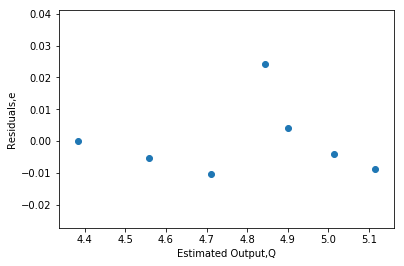

In [14]:
y_hat=regr.predict(Country[['Labour,L','Capital,K']])
y = Country[['Output,Q']]
e= y-y_hat
#In case of multiregression residual plot is plot with y_hat on xaxis and residuals on y axis
plt.scatter(y_hat,e)
plt.xlabel('Estimated Output,Q')
plt.ylabel('Residuals,e')

In [15]:
from sklearn import metrics
x = Country[['Labour,L','Capital,K']]
y_hat = regr.predict(x)
y = Country[['Output,Q']]
print ('R^2:', metrics.r2_score(y_hat,y))

R^2: 0.997913215612455
